In [21]:
from hydra import initialize, compose
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from src.similarity import load_similarity_matrix

In [22]:
with initialize(version_base=None, config_path="../configs/filepaths"):
    filepaths = compose(config_name="base")

In [ ]:
S = load_similarity_matrix(Path(filepaths.results) / "similarity_matrices", "sprhea", "v3_folded_pt_ns", "blosum")
ub = 5e2
lb = -2e3
S = np.where(S > ub, ub, S)
S = np.where(S < lb, lb, S)
sims = S[np.triu_indices_from(S, k=1)]
# sims = (sims - sims.min()) / (sims.max() - sims.min())

In [31]:
percents = [20, 40, 50, 60, 70, 80, 90, 99, 99.9, 99.99]
ptiles = np.percentile(sims, percents)
print(list(zip(percents, ptiles)))

[(20, 0.6531999707221985), (40, 0.7128000259399414), (50, 0.7279999852180481), (60, 0.7387999892234802), (70, 0.7476000189781189), (80, 0.7555999755859375), (90, 0.7644000053405762), (99, 0.7839999794960022), (99.9, 0.9660000205039978), (99.99, 1.0)]


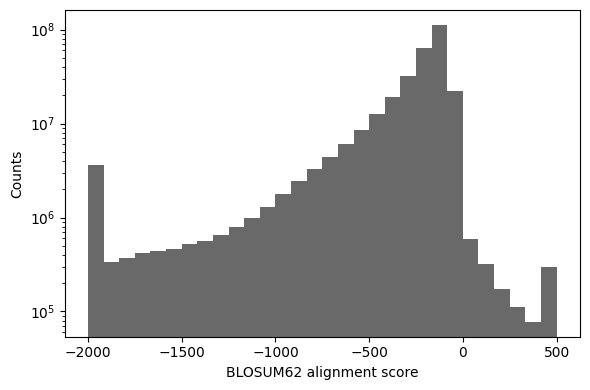

In [9]:
nbins = 30
figsize = (6, 4)
fig, ax = plt.subplots(figsize=figsize)
ax.hist(sims, bins=nbins, color="dimgray")
ax.set_ylabel("Counts")
ax.set_yscale('log')
ax.set_xlabel(f"BLOSUM62 alignment score")
plt.tight_layout()
plt.show()